In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pylab as pl
import numpy as np
import seaborn as sns
%matplotlib inline

In [8]:
df = pd.read_csv("M+E YouTube.csv")

df.head()

,Channel Name,Video title,Video ID,Video length (minutes),Video created,Watch time (minutes),Views,YouTube Red watch time (minutes),YouTube Red views,Average view duration (minutes),...,Shares,Comments,Videos in playlists,Videos added to playlists,Videos removed from playlists,Subscribers,Subscribers gained,Subscribers lost,Average percentage viewed,Watch time (hours)
0,MTV News,Jennifer Lawrence & the �Mockingjay� Cast Get ...,MEz8Td6w8Gg,4.22,"Sep 29, 2015",2682302,998718,2035,692,2.7,...,1845,505,3152,5397,2245,410,428,18,63.69,44705
1,MTV News,David Bowie Criticizes MTV for Not Playing Vid...,XZGiVzIr8Qg,4.67,"Jan 11, 2016",2258867,792590,18658,6888,2.8,...,5176,1282,3297,4562,1265,191,197,6,61.07,37648
2,MTV News,"Prince Performs ""Gett Off"" at the 1991 VMAs | ...",sWPFZoDTdPM,6.90,"Apr 21, 2016",2255035,741621,18112,5821,3.0,...,8087,565,4942,6918,1976,340,346,6,44.07,37584
3,MTV News,Prince's First Television Interview in 1985 | ...,CbENboiR7fU,6.68,"Apr 21, 2016",2089003,518893,20166,5270,4.0,...,4094,558,5783,6675,892,318,326,8,60.24,34817
4,MTV News,UNCENSORED: Miley Cyrus Reacts to Nicki Minaj ...,IrVx6vSUfS4,1.67,"Sep 01, 2015",2081861,1459559,8697,6486,1.4,...,3378,2386,2557,3654,1097,472,480,8,85.58,34698


In [9]:
df.describe()

,Video length (minutes),Watch time (minutes),Views,YouTube Red watch time (minutes),YouTube Red views,Average view duration (minutes),Card clicks,Cards shown,Clicks per card shown,Card teaser clicks,...,Shares,Comments,Videos in playlists,Videos added to playlists,Videos removed from playlists,Subscribers,Subscribers gained,Subscribers lost,Average percentage viewed,Watch time (hours)
count,4702.000000,4.775000e+03,4.775000e+03,4.775000e+03,4775.000000,4775.000000,4775.000000,4.775000e+03,2323.000000,4775.000000,...,4775.000000,4775.000000,4775.000000,4775.000000,4775.000000,4775.000000,4775.000000,4775.000000,4774.000000,4.775000e+03
mean,3.335683,1.280252e+06,4.967822e+05,9.155619e+03,3248.986387,1.957571,484.452984,5.926871e+03,10.184249,3040.781152,...,1065.759372,314.120628,912.522513,1593.490471,680.967958,192.181361,201.388063,9.206702,69.901749,2.133754e+04
std,6.877403,4.702266e+06,1.627842e+06,3.760450e+04,11047.288124,1.620102,2443.821486,3.291084e+04,9.143096,15796.884154,...,6496.124739,2291.442950,2978.225630,4579.961360,1700.062792,1138.387240,1168.822547,36.363543,16.386310,7.837111e+04
min,0.180000,0.000000e+00,1.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,-19.000000,0.000000,0.000000,-22.000000,0.000000,0.000000,0.860000,0.000000e+00
25%,1.370000,1.552050e+04,1.193400e+04,3.800000e+01,33.000000,1.000000,0.000000,0.000000e+00,4.005000,0.000000,...,8.000000,3.000000,19.000000,35.500000,14.000000,1.000000,2.000000,0.000000,62.802500,2.590000e+02
50%,2.250000,1.105660e+05,7.151300e+04,4.060000e+02,282.000000,1.500000,0.000000,0.000000e+00,7.840000,0.000000,...,34.000000,32.000000,109.000000,221.000000,103.000000,11.000000,13.000000,1.000000,72.170000,1.843000e+03
75%,3.720000,5.263870e+05,2.958250e+05,3.071000e+03,1606.500000,2.400000,110.000000,1.533000e+03,13.700000,977.500000,...,249.500000,181.000000,575.500000,1131.500000,514.000000,84.000000,89.000000,5.000000,79.870000,8.773500e+03
max,320.880000,1.211150e+08,3.742415e+07,1.249181e+06,374532.000000,17.600000,65176.000000,1.072451e+06,100.000000,486835.000000,...,225153.000000,136501.000000,69792.000000,96467.000000,30233.000000,56496.000000,57563.000000,1067.000000,278.330000,2.018583e+06


In [6]:
df.count()

Channel Name                                4775
Video title                                 4775
Video ID                                    4775
Video length (minutes)                      4702
Video created                               4702
Watch time (minutes)                        4775
Views                                       4775
YouTube Red watch time (minutes)            4775
YouTube Red views                           4775
Average view duration (minutes)             4775
Card clicks                                 4775
Cards shown                                 4775
Clicks per card shown                       2323
Card teaser clicks                          4775
Card teasers shown                          4775
Teaser clicks per card teaser shown         2349
End screen elements shown                   4775
End screen element clicks                   4775
Clicks per end screen element shown            7
Subscriber views                            4775
Subscriber minutes w

In [61]:
new_df = df[['Channel Name', 'Video length (minutes)', 'Views', 'Average percentage viewed', 'Likes', 'Dislikes', 'Shares', 'Comments']]

new_df.head()

,Channel Name,Video length (minutes),Views,Average percentage viewed,Likes,Dislikes,Shares,Comments
0,MTV News,4.22,998718,63.69,6861,235,1845,505
1,MTV News,4.67,792590,61.07,8484,188,5176,1282
2,MTV News,6.90,741621,44.07,5550,181,8087,565
3,MTV News,6.68,518893,60.24,5391,67,4094,558
4,MTV News,1.67,1459559,85.58,10265,336,3378,2386


In [62]:
# Display null values
new_df[new_df.isnull().any(axis=1)]

,Channel Name,Video length (minutes),Views,Average percentage viewed,Likes,Dislikes,Shares,Comments
295,MTV News,NaN,124,72.67,17,1,0,1
296,MTV News,NaN,39,55.73,2,1,0,0
297,MTV News,NaN,14,60.92,0,0,0,0
300,MTV News,NaN,2,48.15,0,0,0,0
301,MTV News,NaN,4,NaN,65,0,11,14
306,MTV News,NaN,5,3.94,0,0,0,0
307,MTV News,NaN,2,52.50,0,0,0,0
309,MTV News,NaN,3,28.79,0,0,0,0
311,MTV News,NaN,14,90.66,0,0,0,0
313,MTV News,NaN,3,30.56,0,0,0,0


In [63]:
# Since there are only 73 null values, I decided to drop them:

df_raw = new_df.dropna()

In [89]:
df_raw.describe()

,Video length (minutes),Views,Average percentage viewed,Likes,Dislikes,Shares,Comments
count,4702.000000,4.702000e+03,4702.000000,4702.000000,4702.000000,4702.000000,4702.000000
mean,3.335683,5.044850e+05,70.508167,2960.221182,182.052318,1082.301361,318.983199
std,6.877403,1.639248e+06,15.346861,9610.788675,981.315061,6545.000813,2308.830851
min,0.180000,1.000000e+00,1.160000,-1.000000,-1.000000,0.000000,0.000000
25%,1.370000,1.279675e+04,63.350000,44.000000,2.000000,8.000000,4.000000
50%,2.250000,7.491800e+04,72.435000,354.000000,13.000000,36.000000,33.000000
75%,3.720000,3.039705e+05,79.967500,1968.250000,71.000000,260.000000,186.000000
max,320.880000,3.742415e+07,278.330000,230608.000000,30155.000000,225153.000000,136501.000000


In [64]:
df_raw.skew()

Video length (minutes)       26.709576
Views                        10.803374
Average percentage viewed    -0.345719
Likes                        11.524597
Dislikes                     15.983817
Shares                       20.041437
Comments                     46.370239
dtype: float64

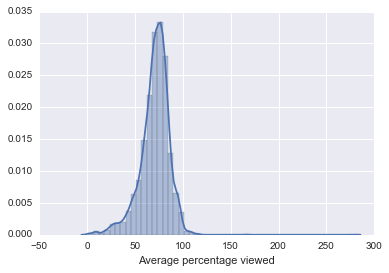

In [65]:
sns.distplot(df_raw['Average percentage viewed'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11ff6a510>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11e8ac4d0>]], dtype=object)

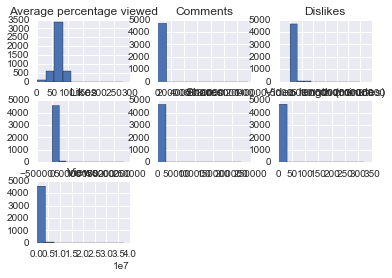

In [67]:
df_raw.hist()

While our target variables, 'Average percentage viewed' seems to follow generally a normal distribution, our feature variables seem to skew heavily to the left. 

In [66]:
df_raw.corr()

,Video length (minutes),Views,Average percentage viewed,Likes,Dislikes,Shares,Comments
Video length (minutes),1.000000,0.029820,-0.358618,0.061405,0.060085,0.032295,0.279968
Views,0.029820,1.000000,0.054184,0.937859,0.254988,0.771742,0.246039
Average percentage viewed,-0.358618,0.054184,1.000000,0.040468,-0.077302,0.029240,-0.069758
Likes,0.061405,0.937859,0.040468,1.000000,0.270206,0.811828,0.286064
Dislikes,0.060085,0.254988,-0.077302,0.270206,1.000000,0.234816,0.348480
Shares,0.032295,0.771742,0.029240,0.811828,0.234816,1.000000,0.238685
Comments,0.279968,0.246039,-0.069758,0.286064,0.348480,0.238685,1.000000


The video length seems to have the strongest correlation to the average percentage views (graphed below). It is not as strong as I would have hypothesized, and it doesn't look like there are any strong correlations with engagement metrics (Likes, Dislikes, Shares, Comments).
Engagement metrics, however, do seem very highly correlated with Views, which may also be interesting to explore.

In [91]:
# I also hypothesized that the channel in which a clip originated may be somewhat correlated.
# However, looking at the below output, it doesn't look like there is a huge difference among channels:

df_raw.groupby(['Channel Name'])['Average percentage viewed'].mean()

Channel Name
CMT                         72.911000
Comedy Central              74.702460
Lip Sync Battle on Spike    59.012348
LogoTV                      72.920600
MTV                         65.566406
MTV Braless                 65.627778
MTV News                    64.261429
MTV2                        74.505200
Spike                       70.762360
TV Land                     77.988680
VH1                         66.780100
Name: Average percentage viewed, dtype: float64

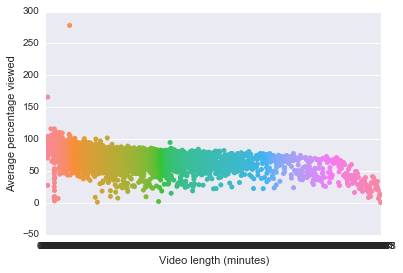

In [68]:
sns.swarmplot(x=df_raw['Video length (minutes)'], y=df_raw['Average percentage viewed'])

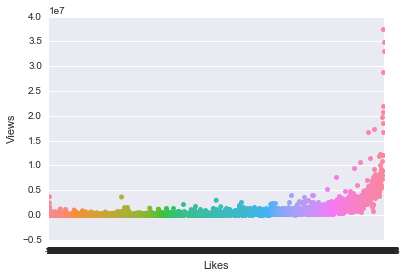

In [73]:
# To demonstrate correlation between Likes and Views:
sns.swarmplot(x=df_raw['Likes'], y=df_raw['Views'])